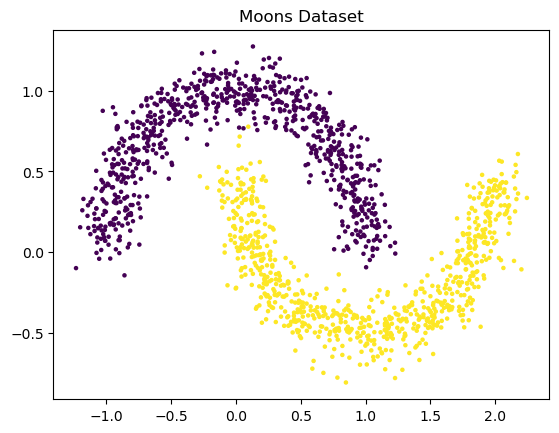

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from scipy.spatial.distance import cdist
from queue import PriorityQueue
import pandas as pd

# Generate moons dataset
X, y = make_moons(n_samples=1500, noise=0.1, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], s=5,c = y)
plt.title("Moons Dataset")
plt.show()


In [90]:


class HierarchicalClustering:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters

    def fit(self, X):
        self.X = X
        self.n_samples = X.shape[0]
        self.labels = np.arange(self.n_samples)
        self.distances = cdist(X, X)  # Pairwise distances between points

        pq = PriorityQueue()
        for i in range(self.n_samples):
            for j in range(i + 1, self.n_samples):
                pq.put((self.distances[i, j], i, j))

        # Perform hierarchical clustering
        while len(np.unique(self.labels)) > self.n_clusters:
            _, i, j = pq.get()
            self._merge_clusters(i, j)

    def _merge_clusters(self, i, j):
        self.labels[self.labels == self.labels[j]] = self.labels[i]
        self.n_samples -= 1

    def cut_tree(self, n_clusters):
        unique_labels = np.unique(self.labels)
        if n_clusters > len(unique_labels):
            raise ValueError("Cannot cut tree into more clusters than the number of distinct labels.")

        labels_sorted = sorted(unique_labels, key=lambda x: np.sum(self.labels == x), reverse=True)
        threshold_label = labels_sorted[n_clusters - 1]
        self.labels[self.labels > threshold_label] = threshold_label + 1

        return self.labels




In [91]:
X = pd.read_csv('moons.csv')
X.columns = ['x', 'y']
# Run hierarchical clustering on moons dataset
hc = HierarchicalClustering(n_clusters=2)
hc.fit(X)
labels = hc.cut_tree(n_clusters=2)


In [92]:
X

,x,y
0,-0.378142,0.940750
1,0.933566,0.153805
2,2.048309,0.498172
3,0.947891,0.162473
4,2.000739,0.183700
...,...,...
1495,-0.022346,0.425338
1496,0.090974,0.098361
1497,1.390850,-0.439987
1498,-0.652389,0.769648


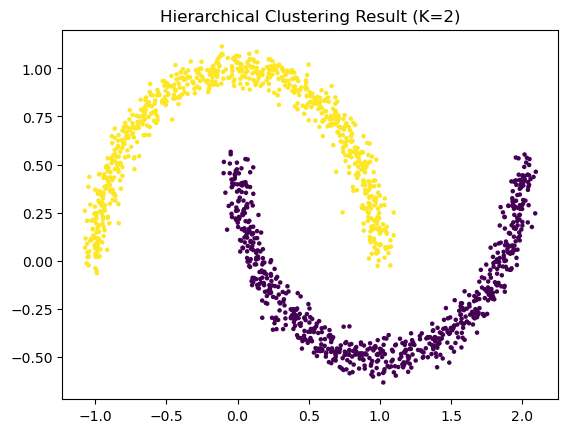

In [93]:

# Plot the clustering result
plt.scatter(X['x'], X['y'], c=labels, s=5)
plt.title("Hierarchical Clustering Result (K=2)")
plt.show()

In [94]:
from sklearn.metrics import silhouette_score

# Evaluate clustering performance
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.33600871323530146


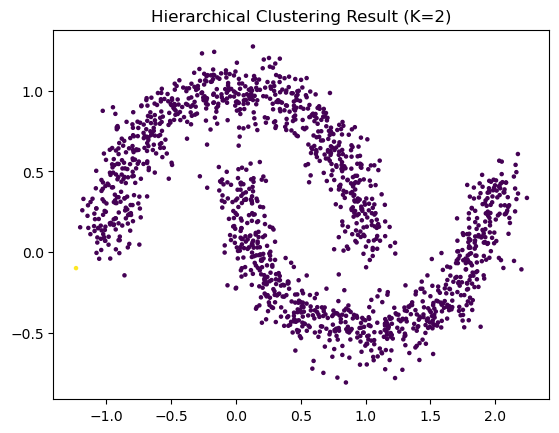

Silhouette Score: 0.2526394002676676


In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Generate moons dataset
X, y = make_moons(n_samples=1500, noise=0.1, random_state=42)

# Perform hierarchical clustering
n_clusters = 2 # Number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,linkage='single')
labels = agg_clustering.fit_predict(X)

# Plot the clustering result
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5)
plt.title("Hierarchical Clustering Result (K=2)")
plt.show()

# Evaluate clustering performance
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


In [96]:
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from scipy.spatial.distance import pdist, squareform,cdist
from scipy.cluster.vq import kmeans2
from matplotlib import pyplot as plt
from scipy.spatial import cKDTree
import numpy as np
import pandas as pd

In [97]:
#compute the distance matrix
matrix_ward = linkage(X, method='ward',metric='euclidean')
matrix_single = linkage(X, method='single',metric='euclidean')

In [98]:
# obtan cluster labels
labels_ward = fcluster(matrix_ward,2, criterion='maxclust')
labels_single = fcluster(matrix_single,2, criterion='maxclust')

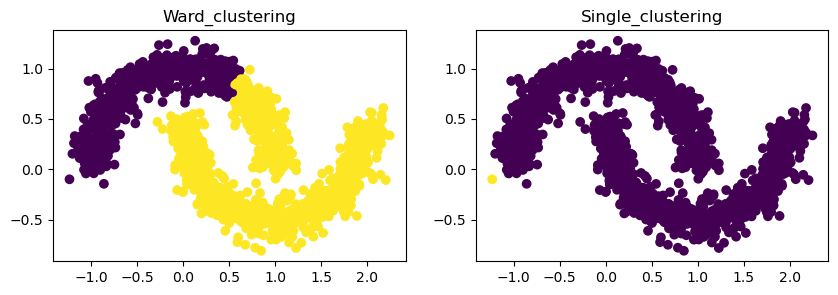

In [99]:
fig,ax = plt.subplots(1,2,figsize=(10,3))

ax[0].scatter(X[:, 0],X[:, 1],c=labels_ward)
ax[0].title.set_text('Ward_clustering')

ax[1].scatter(X[:, 0],X[:, 1],c=labels_single)
ax[1].title.set_text('Single_clustering')

In [100]:
data_ds = pd.read_csv('moons.csv')
data_ds.columns = ['x', 'y']
data_ds

,x,y
0,-0.378142,0.940750
1,0.933566,0.153805
2,2.048309,0.498172
3,0.947891,0.162473
4,2.000739,0.183700
...,...,...
1495,-0.022346,0.425338
1496,0.090974,0.098361
1497,1.390850,-0.439987
1498,-0.652389,0.769648


In [101]:
data_ds = pd.DataFrame(X, columns=['x','y'])
data_ds

,x,y
0,0.981321,-0.499666
1,1.844094,0.072311
2,-0.060090,1.048577
3,-0.174089,1.099558
4,-0.464776,0.877356
...,...,...
1495,1.023138,-0.517279
1496,1.819711,-0.081774
1497,0.090123,0.020222
1498,1.835271,0.332585


In [102]:
#compute the distance matrix
matrix_ward = linkage(data_ds, method='ward',metric='euclidean')
matrix_single = linkage(data_ds, method='single',metric='euclidean')

In [103]:
# obtan cluster labels
labels_ward = fcluster(matrix_ward,2, criterion='maxclust')
labels_single = fcluster(matrix_single,2, criterion='maxclust')

In [104]:
data_ds['labels_ward'] = labels_ward
data_ds['labels_single'] = labels_single

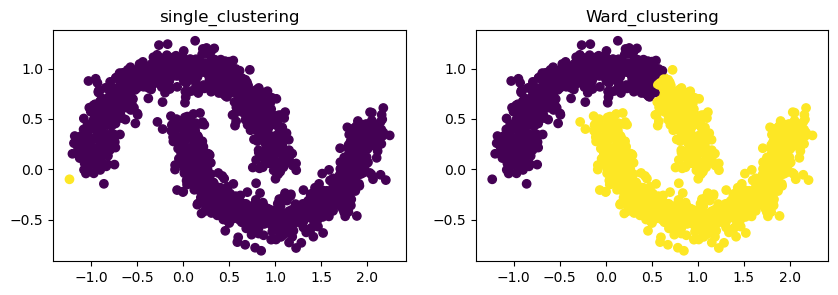

In [105]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
ax[0].scatter(data_ds['x'],data_ds['y'],c=data_ds['labels_single'])
ax[0].title.set_text('single_clustering')

ax[1].scatter(data_ds['x'],data_ds['y'],c=data_ds['labels_ward'])
ax[1].title.set_text('Ward_clustering')